# Logistic Model

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Model" data-toc-modified-id="Logistic-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Model</a></span></li><li><span><a href="#Sample-2---w/-splines" data-toc-modified-id="Sample-2---w/-splines-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample 2 - w/ splines</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#spline-terms" data-toc-modified-id="spline-terms-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>spline terms</a></span><ul class="toc-item"><li><span><a href="#finding-spline-terms" data-toc-modified-id="finding-spline-terms-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>finding spline terms</a></span></li><li><span><a href="#create-spline-terms" data-toc-modified-id="create-spline-terms-2.0.1.2"><span class="toc-item-num">2.0.1.2&nbsp;&nbsp;</span>create spline terms</a></span></li></ul></li></ul></li><li><span><a href="#Tuning-parameter" data-toc-modified-id="Tuning-parameter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tuning parameter</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Cross-Validation</a></span></li></ul></li><li><span><a href="#sklearn" data-toc-modified-id="sklearn-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>sklearn</a></span><ul class="toc-item"><li><span><a href="#Coef" data-toc-modified-id="Coef-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Coef</a></span></li><li><span><a href="#KS" data-toc-modified-id="KS-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>KS</a></span></li><li><span><a href="#AUC" data-toc-modified-id="AUC-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>AUC</a></span></li><li><span><a href="#ROC" data-toc-modified-id="ROC-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>ROC</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Confusion Matrix</a></span><ul class="toc-item"><li><span><a href="#using-ROC-as-best-threshold" data-toc-modified-id="using-ROC-as-best-threshold-2.2.5.1"><span class="toc-item-num">2.2.5.1&nbsp;&nbsp;</span>using ROC as best threshold</a></span></li><li><span><a href="#using-max-f1-score-as-threshold" data-toc-modified-id="using-max-f1-score-as-threshold-2.2.5.2"><span class="toc-item-num">2.2.5.2&nbsp;&nbsp;</span>using max f1-score as threshold</a></span></li></ul></li></ul></li><li><span><a href="#sklearn-after-adjust-class_weight---cost-sensitive-learning" data-toc-modified-id="sklearn-after-adjust-class_weight---cost-sensitive-learning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>sklearn-after adjust class_weight - cost sensitive learning</a></span><ul class="toc-item"><li><span><a href="#KS" data-toc-modified-id="KS-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>KS</a></span></li><li><span><a href="#auc" data-toc-modified-id="auc-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>auc</a></span></li><li><span><a href="#roc" data-toc-modified-id="roc-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>roc</a></span></li><li><span><a href="#confusion-matrix" data-toc-modified-id="confusion-matrix-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>confusion matrix</a></span><ul class="toc-item"><li><span><a href="#using-ROC-as-best-threshold" data-toc-modified-id="using-ROC-as-best-threshold-2.3.4.1"><span class="toc-item-num">2.3.4.1&nbsp;&nbsp;</span>using ROC as best threshold</a></span></li><li><span><a href="#using-max-f1-score-as-threshold" data-toc-modified-id="using-max-f1-score-as-threshold-2.3.4.2"><span class="toc-item-num">2.3.4.2&nbsp;&nbsp;</span>using max f1-score as threshold</a></span></li></ul></li></ul></li><li><span><a href="#oversampling" data-toc-modified-id="oversampling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>oversampling</a></span><ul class="toc-item"><li><span><a href="#random-oversampling" data-toc-modified-id="random-oversampling-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>random oversampling</a></span></li><li><span><a href="#smote-oversampling" data-toc-modified-id="smote-oversampling-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>smote oversampling</a></span></li></ul></li></ul></li></ul></div>

In [53]:
import pandas as pd
import math 
import random
import numpy as np
import itertools as itt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy import median
from sklearn.metrics import f1_score
from scipy import stats
from scipy.stats import norm
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_hastie_10_2

In [2]:
from define_function import logitR
from define_function import logit_pvalue
from define_function import probhist 
from define_function import KS 
from define_function import auc 
from define_function import ROC 
from define_function import cp 
from define_function import plot_confusion_matrix

<a id="sample2"></a>
# Sample 2 - w/ splines

In [4]:
sample2 = pd.read_csv('final_sample_uni_nooutlier2.csv')
#Remove fico lower than 550
sample2 = sample2[~(sample2['fico'] <= 550)]

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,25,28,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### spline terms

#### finding spline terms

In [75]:
fico = sample2.groupby(['fico']).agg(total_count = ('d90_flag', 'count'),
                                   default_rate = ('d90_flag', 'mean'))
fico.reset_index(inplace=True)

In [187]:
fico.to_csv('fico.csv')

In [82]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [83]:
data_x= fico.fico
data_y= fico.default_rate
# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

In [104]:
# Generating cubic spline with 3 knots
transformed_x = dmatrix("bs(train, knots=(640,710), degree=2, include_intercept=False)"
                        , {"train": train_x},return_type='dataframe')
# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(train_y, transformed_x).fit()
xp = np.linspace(valid_x.min(),valid_x.max())
pred1 = fit1.predict(dmatrix("bs(xp, knots=(640,710),degree =2, include_intercept=False)"
                             , {"xp": xp}, return_type='dataframe'))

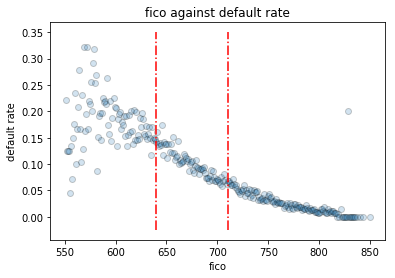

In [123]:
plt.scatter(data_x, data_y, edgecolor = 'k', alpha=0.2)
#plt.plot(xp, pred1, color='r', label='Specifying degree =2 with 2 knots')
plt.title('fico against default rate')
plt.xlabel('fico')
plt.ylabel('default rate')
plt.vlines(640,-0.025,0.35,colors='r',linestyles='dashdot')
plt.vlines(710,-0.025,0.35,colors='r',linestyles='dashdot')
plt.show()

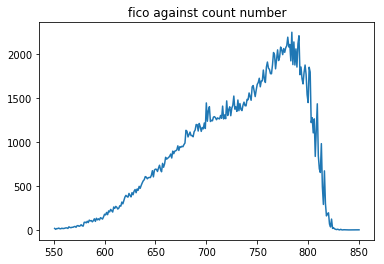

In [121]:
plt.plot(dr['fico'], dr['total_count'])
plt.title('fico against count number')
plt.show()

In [195]:
#Remove fico lower than 550
sample2 = sample2[~(sample2['fico'] <= 550)]

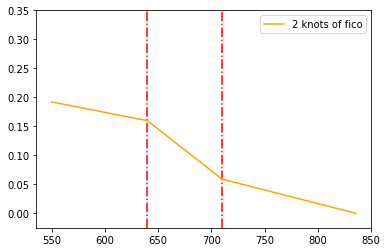

In [191]:

plt.plot([550,640,710,836],[0.192045,0.15969,0.05899,0.00],color='orange',label='2 knots of fico')
plt.legend()
plt.ylim(-0.025,0.35)
plt.vlines(640,-0.025,0.35,colors='r',linestyles='dashdot')
plt.vlines(710,-0.025,0.35,colors='r',linestyles='dashdot')

plt.show()

In [125]:
dti = sample2.groupby(['dti']).agg(total_count = ('d90_flag', 'count'),
                                   default_rate = ('d90_flag', 'mean'))
dti.reset_index(inplace=True)

In [177]:
dti.to_csv('dti.csv')

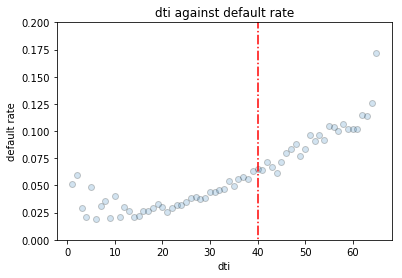

In [181]:
plt.scatter(dti.dti, dti.default_rate, edgecolor = 'k', alpha=0.2)
#plt.plot(xp, pred1, color='r', label='Specifying degree =2 with 2 knots')
plt.title('dti against default rate')
plt.xlabel('dti')
plt.ylabel('default rate')
plt.ylim(0,0.20)
plt.vlines(40,-0.025,0.20,colors='r',linestyles='dashdot')
plt.show()

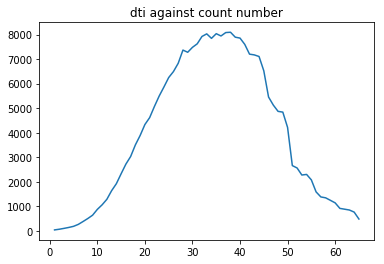

In [130]:
plt.plot(dti['dti'], dti['total_count'])
plt.title('dti against count number')
plt.show()

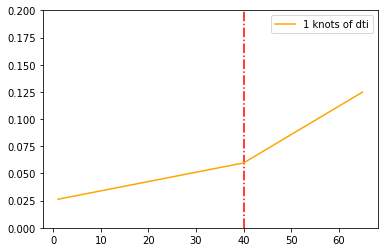

In [192]:
#fitting learner regression in excel
plt.plot([1,40,65],[0.02628,0.05966,0.12474],color='orange',label='1 knots of dti')
plt.legend()
plt.ylim(0,0.20)
plt.vlines(40,0,0.20,colors='r',linestyles='dashdot')
plt.show()

In [131]:
ocltv = sample2.groupby(['ocltv']).agg(total_count = ('d90_flag', 'count'),
                                   default_rate = ('d90_flag', 'mean'))
ocltv.reset_index(inplace=True)

In [184]:
ocltv.to_csv('ocltv.csv')

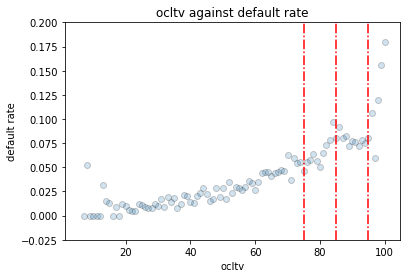

In [176]:
plt.scatter(ocltv.ocltv, ocltv.default_rate, edgecolor = 'k', alpha=0.2)
#plt.plot(xp, pred1, color='r', label='Specifying degree =2 with 2 knots')


plt.title('ocltv against default rate')
plt.xlabel('ocltv')
plt.ylabel('default rate')
plt.ylim(-0.025,0.2)
plt.vlines(75,-0.025,0.20,colors='r',linestyles='dashdot')
plt.vlines(85,-0.025,0.20,colors='r',linestyles='dashdot')
plt.vlines(95,-0.025,0.20,colors='r',linestyles='dashdot')
plt.show()

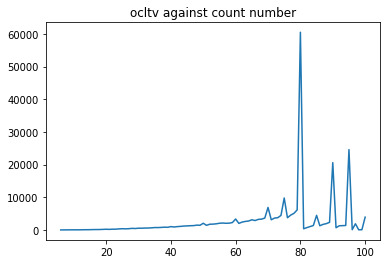

In [136]:
plt.plot(ocltv['ocltv'], ocltv['total_count'])
plt.title('ocltv against count number')
plt.show()

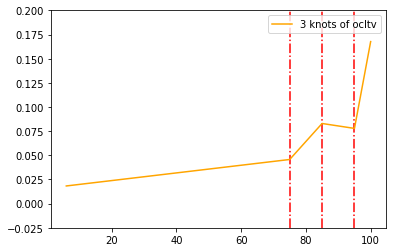

In [186]:

plt.plot([6,75,85,95,100],[0.018296,0.04569,0.08294,0.07785,0.16767],color='orange',label='3 knots of ocltv')
plt.legend()
plt.ylim(-0.025,0.2)
plt.vlines(75,-0.025,0.2,colors='r',linestyles='dashdot')
plt.vlines(85,-0.025,0.2,colors='r',linestyles='dashdot')
plt.vlines(95,-0.025,0.2,colors='r',linestyles='dashdot')
plt.show()

#### create spline terms

In [5]:
# Create Splines
sample2['fico_640'] = sample2['fico'].apply(lambda x: max(x-639,0))
sample2['fico_710'] = sample2['fico'].apply(lambda x: max(x-709,0))

sample2['dti_40'] = sample2['dti'].apply(lambda x: max(x-39,0))

sample2['ocltv_75'] = sample2['ocltv'].apply(lambda x: max(x-74,0))
sample2['ocltv_85'] = sample2['ocltv'].apply(lambda x: max(x-84,0))
sample2['ocltv_95'] = sample2['ocltv'].apply(lambda x: max(x-94,0))

#sample2['orig_rt_6'] = sample2['orig_rt'].apply(lambda x: max(x-5.99,0))
#sample2['orig_rt_7'] = sample2['orig_rt'].apply(lambda x: max(x-6.99,0))

In [6]:
#get dummies
cat_vars=['channel','flag_fthb','loan_purpose', 'prop_type', 'occpy_sts']

sample2=pd.get_dummies(sample2,
                   prefix_sep='_',
                   drop_first=False,
                   columns=cat_vars)

In [7]:
train2 = sample2[sample2['orig_year'] % 2 == 0]
test2 = sample2[sample2['orig_year'] % 2 == 1]

In [8]:
X_cols2 = ['fico',
           'fico_640' , 
           'fico_710', 
           'dti',
          'dti_40',
           'ocltv',
         'ocltv_75','ocltv_85', 'ocltv_95',
         'rel_median_orig_upb',
         'num_unit',
         'cnt_borr',
         'flag_fthb_Y', 
         'occpy_sts_I', 'occpy_sts_S',
         'channel_B', 'channel_C',
         'prop_type_CO', 'prop_type_PU',
         'sato',
         'loan_purpose_C'
          ] 


In [9]:
X_train2 = train2[X_cols2]
X_test2 = test2[X_cols2]

In [10]:
y_train2 = train2['d90_flag']
y_test2 = test2['d90_flag']

<a id="tuning2"></a>
## Tuning parameter

In [71]:
from sklearn.model_selection import GridSearchCV
scores = {'AUC': 'roc_auc'}

parameters = {"penalty": ("l1", "l2"),
    "C": (0.001, 0.01, 0.1, 1, 10)
   # "class_weight":(None, {1:3025, 0:2500})
}
    
lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000,tol=1e-5,solver= "liblinear"), 
                  parameters, scoring = scores,refit='AUC', return_train_score=True)
lr.fit(X_train2, y_train2)

print("Best parameters set found on development set:")
print()
print(lr.best_params_)
print()
print("Grid scores on development set:")
print()
means = lr.cv_results_['mean_test_AUC']
stds = lr.cv_results_['std_test_AUC']
for mean, std, params in zip(means, stds, lr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pleas

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

Best parameters set found on development set:

{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

Grid scores on development set:

nan (+/-nan) for {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'lbfgs'}
0.740 (+/-0.091) for {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
0.766 (+/-0.080) for {'C': 0.001, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
0.766 (+/-0.080) for {'C': 0.001, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.001, 'class_weight': {1: 3025, 0: 2500}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.757 (+/-0.056) for {'C': 0.001, 'class_weight': {1: 3025, 0: 2500}, 'penalty': 'l1', 'solver': 'liblinear'}
0.758 (+/-0.056) for {'C': 0.001, 'class_weight': {1: 3025, 0: 2500}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.757 (+/-0.057) for {'C': 0.001, 'class_weight': {1: 3025, 0: 2500}, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.01, 'class_weight': 

<a id="cv2"></a>
###  Cross-Validation

In [157]:
from sklearn.linear_model import LogisticRegressionCV
penalty = ['l1','l2','elasticnet','none'] 
C = [0.001, 0.05, 0.01, 0.1, 1, 10, 100]
solver = 'liblinear' 

In [158]:
tuned_parameters = [{'solver': ['liblinear'], 'penalty': ['l2'], 
                     'C': [0.001, 0.05, 0.01, 0.1, 1, 10, 100]}]
scores = {'AUC': 'roc_auc'}  # can use make_scorer() to make score on KS and dollar loss

In [159]:
C = [0.05, 0.01, 0.1, 1]
print("# Tuning hyper-parameters")
print()
 

logit = LogisticRegressionCV(cv=5, random_state=0, penalty='l2', C=C, solver='liblinear' , scoring = 'roc_auc', refit='roc_auc').fit(X_train2, y_train2)


print("Best parameters set found on development set:")
print()
print(logit.C_)
print()
print("Grid scores on development set:")
print()
#means = logit.scores_['mean_test_AUC']
#stds = logit.scores_['std_test_AUC']
#for mean, std, params in zip(means, stds, logit.scores_['params']):
#    print("%0.3f (+/-%0.03f) for %r"
#         % (mean, std * 2, params))
#print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full validation set.")
print()
y_true, y_pred = y_test2, logit.predict(X_test2)
print(classification_report(y_true, y_pred))
print('recall=%0.5f' % recall_score(y_true, y_pred))
print('preciaion=%0.5f' % precision_score(y_true, y_pred))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

[0.01]

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full validation set.

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    120974
           1       0.42      0.00      0.00      7442

    accuracy                           0.94    128416
   macro avg       0.68      0.50      0.49    128416
weighted avg       0.91      0.94      0.91    128416

recall=0.00107
preciaion=0.42105



<a id="sklearn2"></a>
## sklearn

In [11]:
penalty = 'l2' 
C = 0.01
solver = 'liblinear'
#class_weight = None
logmodel2,coef_sk2 = logitR(penalty,C,solver,X_train2, y_train2, X_cols2)

adjust class weight by dollar loss

### Coef

In [12]:
coefs2, p2 = logit_pvalue(logmodel2, X_train2)
X_cols_inc2 = X_cols2[:]
X_cols_inc2.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc2, 'coeffienct':coefs2, 'P_value':p2.round(6)})
p_value 

,feature,coeffienct,P_value
0,Intercept,0.004315,0.995691
1,fico,-0.006511,0.000000
2,fico_640,-0.004299,0.010475
3,fico_710,-0.003858,0.000864
4,dti,0.014834,0.000000
5,dti_40,0.015107,0.000118
6,ocltv,0.025594,0.000000
7,ocltv_75,0.020016,0.006364
8,ocltv_85,-0.050531,0.000002
9,ocltv_95,0.154594,0.000000


<a id="measure"></a>
### KS

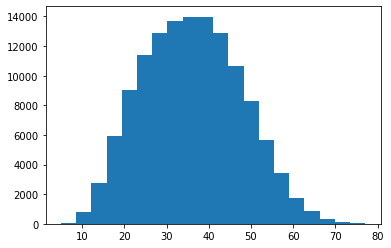

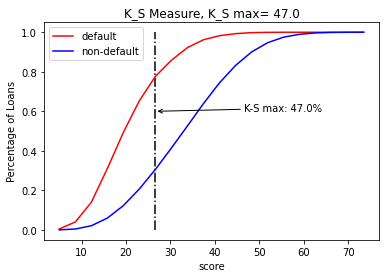

In [14]:
# for validation set
log_prob_model = -(logmodel2.predict_log_proba(X_test2)[:, 1] )*10
lower_score2, upper_score2, final_score2=probhist(log_prob_model, y_test2)
KS_max2 = KS(lower_score2, upper_score2, final_score2)

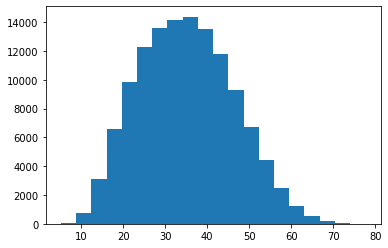

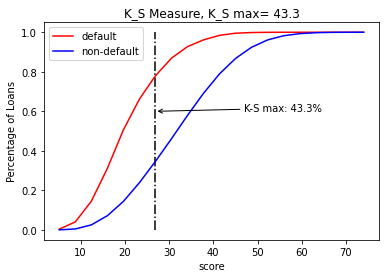

In [15]:
#for development set
log_prob_model = -(logmodel2.predict_log_proba(X_train2)[:, 1] )*10
lower_score2, upper_score2, final_score2=probhist(log_prob_model, y_train2)
KS_max2 = KS(lower_score2, upper_score2, final_score2)

### AUC

In [15]:
#for validation set
auc1 = auc(logmodel2, X_test2, y_test2)
print(auc1)

0.8078810909357959


In [16]:
#for development set
auc1_train = auc(logmodel2, X_train2, y_train2)
print(auc1_train)

0.7888669070927244


### ROC

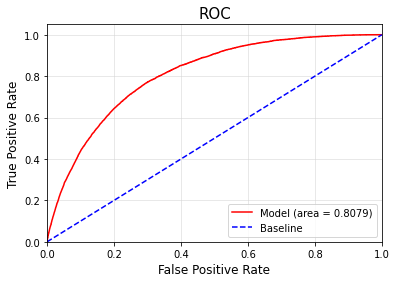

When fpr = 0.2, tpr =  0.626175759204515
Best Threshold=0.052408


In [17]:
best_threshold, tpr, fpr = ROC(logmodel2, X_test2, y_test2, auc1)

<a id="confusion2"></a>
### Confusion Matrix

#### using ROC as best threshold

percentage : 0.3124922128083728
index cut-off: 40129
probability cut-off : 0.05240816093245963

              precision    recall  f1-score   support

           0       0.98      0.71      0.83    120974
           1       0.14      0.76      0.24      7442

    accuracy                           0.72    128416
   macro avg       0.56      0.74      0.53    128416
weighted avg       0.93      0.72      0.79    128416

recall=0.75531
precision=0.14007
f1_score=0.23632


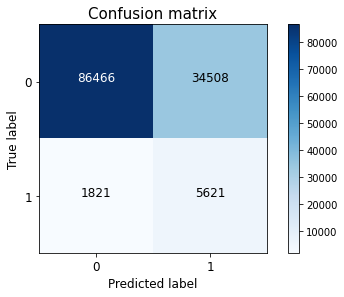

In [18]:
y_prob = logmodel2.predict_proba(X_test2)[:,1]
y_prob_new = np.sort(y_prob)[::-1]
index = np.where(y_prob_new == best_threshold)[0][0]
print('percentage :',index/len(y_test2))
print('index cut-off:', index)
print('probability cut-off :', best_threshold)
print()

y_prob, cm = cp(logmodel2, X_test2, y_test2, best_threshold)
plot_confusion_matrix(cm, classes=[0,1], title='Confusion matrix')

In [21]:
2230*40500+28925*3520

192131000

#### using max f1-score as threshold

In [135]:
y_prob = logmodel2.predict_proba(X_test2)[:,1]
y_prob_new = np.sort(y_prob)[::-1]

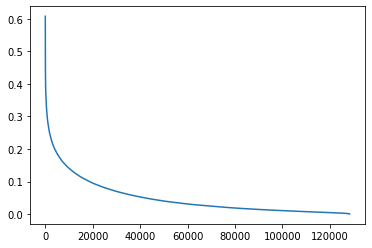

In [137]:
plt.plot(y_prob_new)

percentage : 0.12265605532020932
index cut-off: 15751
probability cut-off : 0.1108941788607104

              precision    recall  f1-score   support

           0       0.96      0.90      0.93    120974
           1       0.21      0.45      0.29      7442

    accuracy                           0.87    128416
   macro avg       0.59      0.67      0.61    128416
weighted avg       0.92      0.87      0.89    128416

f1-score=0.28655
precision=0.21097
recall=0.44652



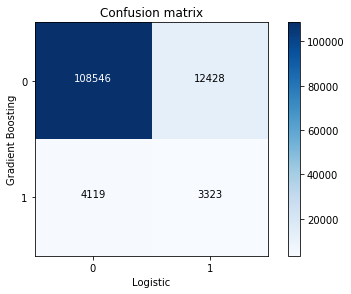

In [144]:
y_prob = logmodel2.predict_proba(X_test2)[:,1]
y_prob_new = np.sort(y_prob)[::-1]
max_f1 = 0
opt_prob = y_prob_new[0]
index = 0
for i in range(int(len(y_prob_new)*0.2)):
    predict_mine = np.where(y_prob > y_prob_new[i], 1, 0)
    y_true2, y_pred2 = y_test2, logmodel2.predict(X_test2)
    if (f1_score(y_true2, predict_mine) > max_f1):
        max_f1 = f1_score(y_true2, predict_mine)
        opt_prob = y_prob_new[i]
        index = i
predict_mine = np.where(y_prob > opt_prob, 1, 0)
y_true2, y_pred2 = y_test2, logmodel2.predict(X_test2)
print('percentage :',index/len(y_test2))
print('index cut-off:', index)
print('probability cut-off :', opt_prob)
print()

y_prob, cm = cp(logmodel2, X_test2, y_test2, opt_prob)
plot_confusion_matrix(cm, classes=[0,1], title='Confusion matrix')

In [20]:
4119*40500+12428*3520

210566060

## sklearn-after adjust class_weight - cost sensitive learning

In [19]:
class_weight = {1:40500, 0:3520}
penalty = 'l2' 
C = 0.01
solver = 'liblinear'
logmodel3 = LogisticRegression(penalty=penalty,class_weight=class_weight,
                               C=C,solver=solver,max_iter=1000,tol=1e-5)
logmodel3.fit(X_train2, y_train2)

#coefficient
coef_sk3 = pd.DataFrame(logmodel3.coef_).T
coef_sk3['feature'] = X_cols2
coef_sk3.set_index('feature',inplace=True)


In [27]:
coefs3, p3 = logit_pvalue(logmodel3, X_train2)
X_cols_inc2 = X_cols2[:]
X_cols_inc2.insert(0,'Intercept')
p_value3 = pd.DataFrame({'feature':X_cols_inc2, 'coeffienct':coefs2, 'P_value':p3.round(6)})
p_value3

,feature,coeffienct,P_value
0,Intercept,0.004315,0.000001
1,fico,-0.006511,0.000000
2,fico_640,-0.004299,0.000607
3,fico_710,-0.003858,0.000000
4,dti,0.014834,0.000000
5,dti_40,0.015107,0.000000
6,ocltv,0.025594,0.000000
7,ocltv_75,0.020016,0.000021
8,ocltv_85,-0.050531,0.000000
9,ocltv_95,0.154594,0.000000


### KS

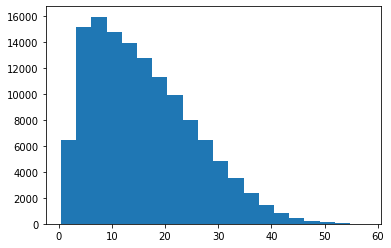

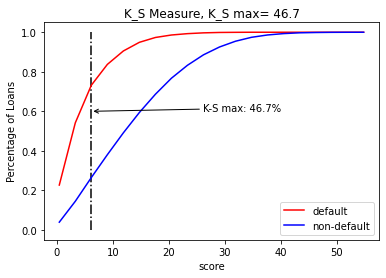

In [28]:
#test
log_prob_model3 = -(logmodel3.predict_log_proba(X_test2)[:, 1] )*10
lower_score3, upper_score3, final_score3=probhist(log_prob_model3, y_test2)
KS_max3 = KS(lower_score3, upper_score3, final_score3)

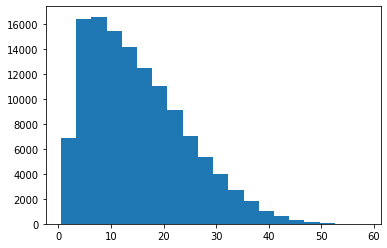

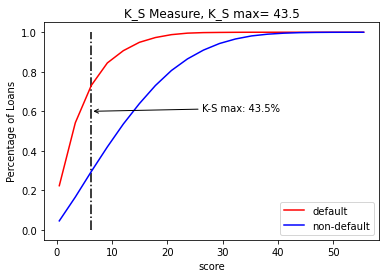

In [29]:
#train
log_prob_model3 = -(logmodel3.predict_log_proba(X_train2)[:, 1] )*10
lower_score3, upper_score3, final_score3=probhist(log_prob_model3, y_train2)
KS_max3_train = KS(lower_score3, upper_score3, final_score3)

### auc

In [20]:
#test
auc3 = auc(logmodel3, X_test2, y_test2)
print(auc3)

0.8084199448650521


In [21]:
#train
auc3_train = auc(logmodel3, X_train2, y_train2)
print(auc3_train)

0.7895057208189108


### roc 

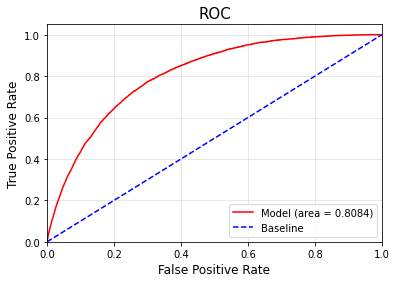

When fpr = 0.2, tpr =  0.6272507390486428
Best Threshold=0.380615


In [33]:
best_threshold3, tpr, fpr = ROC(logmodel3, X_test2, y_test2, auc3)

### confusion matrix

#### using ROC as best threshold

percentage : 0.3177096311986045
index cut-off: 40799
probability cut-off : 0.3806146647191079

              precision    recall  f1-score   support

           0       0.98      0.71      0.82    120974
           1       0.14      0.76      0.24      7442

    accuracy                           0.71    128416
   macro avg       0.56      0.74      0.53    128416
weighted avg       0.93      0.71      0.79    128416

recall=0.76216
precision=0.13902
f1_score=0.23515


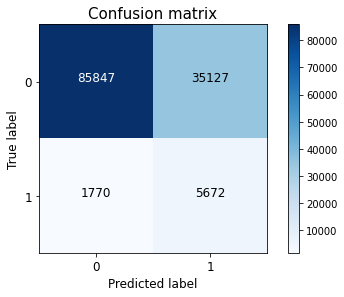

In [35]:
y_prob3 = logmodel3.predict_proba(X_test2)[:,1]
y_prob_new3 = np.sort(y_prob3)[::-1]
index3 = np.where(y_prob_new3 == best_threshold3)[0][0]
print('percentage :',index3/len(y_test2))
print('index cut-off:', index3)
print('probability cut-off :', best_threshold3)
print()

y_prob3, cm3 = cp(logmodel3, X_test2, y_test2, best_threshold3)
plot_confusion_matrix(cm3, classes=[0,1], title='Confusion matrix')

In [36]:
1770*40500+35127*3520

195332040

#### using max f1-score as threshold

In [60]:
y_prob3 = logmodel3.predict_proba(X_test2)[:,1]
y_prob_new3 = np.sort(y_prob3)[::-1]

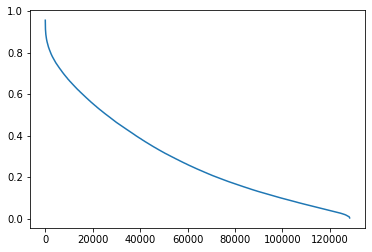

In [37]:
plt.plot(y_prob_new3)

percentage : 0.13122975330176925
index cut-off: 16852
probability cut-off : 0.5873789330021234

              precision    recall  f1-score   support

           0       0.96      0.89      0.93    120974
           1       0.21      0.47      0.29      7442

    accuracy                           0.86    128416
   macro avg       0.59      0.68      0.61    128416
weighted avg       0.92      0.86      0.89    128416

recall=0.46694
precision=0.20621
f1_score=0.28608


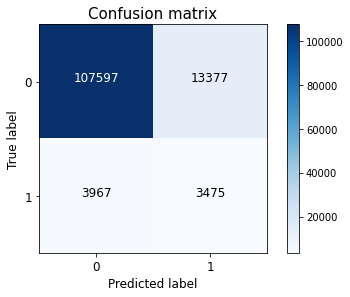

In [54]:
y_prob = logmodel3.predict_proba(X_test2)[:,1]
y_prob_new = np.sort(y_prob)[::-1]
max_f1 = 0
opt_prob = y_prob_new[0]
index = 0
for i in range(int(len(y_prob_new)*0.2)):
    predict_mine = np.where(y_prob > y_prob_new[i], 1, 0)
    y_true2, y_pred2 = y_test2, logmodel3.predict(X_test2)
    if (f1_score(y_true2, predict_mine) > max_f1):
        max_f1 = f1_score(y_true2, predict_mine)
        opt_prob = y_prob_new[i]
        index = i
predict_mine = np.where(y_prob > opt_prob, 1, 0)
y_true2, y_pred2 = y_test2, logmodel3.predict(X_test2)
print('percentage :',index/len(y_test2))
print('index cut-off:', index)
print('probability cut-off :', opt_prob)
print()

y_prob, cm = cp(logmodel3, X_test2, y_test2, opt_prob)
plot_confusion_matrix(cm, classes=[0,1], title='Confusion matrix')

In [55]:
3967*40500+13377*3520

207750540

## oversampling

### random oversampling

In [48]:
#random oversampling
from imblearn.over_sampling import RandomOverSampler
ros2 = RandomOverSampler(random_state=0)
X_train2_b, y_train2_b = ros2.fit_resample(X_train2, y_train2)

from collections import Counter
print(sorted(Counter(y_train2_b).items()))

[(0, 118556), (1, 118556)]


In [45]:
penalty = 'l2' 
C = 0.01 
solver = 'liblinear'
logmodel_random,coef_sk_random = logitR(penalty,C,solver,X_train2_b, y_train2_b, X_cols2)

coefs, p = logit_pvalue(logmodel_random, X_train2_b)
X_cols_inc = X_cols2[:]
X_cols_inc.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc, 'coeffienct':coefs, 'P_value':p.round(6)})
p_value 

,feature,coeffienct,P_value
0,Intercept,0.287643,0.408502
1,fico,-0.002339,0.000021
2,fico_640,-0.010213,0.000000
3,fico_710,-0.002430,0.000000
4,dti,0.015585,0.000000
5,dti_40,0.018446,0.000000
6,ocltv,0.027711,0.000000
7,ocltv_75,0.014392,0.000000
8,ocltv_85,-0.035770,0.000000
9,ocltv_95,0.139598,0.000000


In [46]:
#for validation set
auc_random = auc(logmodel_random, X_test2, y_test2)
print(auc_random)

0.8080817288406397


### smote oversampling

In [49]:
#smote
from imblearn.over_sampling import SMOTE
os2 = SMOTE(random_state=0)
X_train2_b, y_train2_b=os2.fit_sample(X_train2, y_train2)

from collections import Counter
print(sorted(Counter(y_train2_b).items()))

[(0, 118556), (1, 118556)]


In [50]:
penalty = 'l2' 
C = 0.01 
solver = 'liblinear'
logmodel_smote,coef_sk_smote = logitR(penalty,C,solver,X_train2_b, y_train2_b, X_cols2)

coefs, p = logit_pvalue(logmodel_smote, X_train2_b)
X_cols_inc = X_cols2[:]
X_cols_inc.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc, 'coeffienct':coefs, 'P_value':p.round(6)})
p_value 

,feature,coeffienct,P_value
0,Intercept,0.406802,0.297228
1,fico,0.001838,0.002831
2,fico_640,-0.014830,0.000000
3,fico_710,-0.003811,0.000000
4,dti,0.023593,0.000000
5,dti_40,-0.003836,0.022598
6,ocltv,0.035439,0.000000
7,ocltv_75,-0.040329,0.000000
8,ocltv_85,0.016346,0.000328
9,ocltv_95,0.057948,0.000000


In [51]:
#for validation set
auc_smote = auc(logmodel_smote, X_test2, y_test2)
print(auc_smote)

0.7297850646339695
